# ROSSMANN SALES ANALYSIS

# Introduction

This analysis is based on a [Kaggle dataset](https://www.kaggle.com/c/rossmann-store-sales) about the Rossmann sales.

Rossmann is a German drugstore chain which has more than 3000 shops in 7 countries. This dataset is only based on the German based shops, 1115 in total.

This project will be divided into 2 main parts: 

- Understanding the current situation, by cleaning the data and exploring it (EDA).

- Forecasting the sales that are depending on factors such as promotions, competition, school holidays, state holidays, seasonality, and locality.

For the first step, I am using Python programming language and libraries such as Pandas, Matplotlib, Seaborn and Plotly for data cleaning, analysis and visualization.

The second step will be done using scikit (Python library for Machine learning) and the content will be published once completed.

PS: Please note that no currency has been specified in the project description, therefore when mentioning the sales results I won't be able to specify it either. 



# Data Import and Cleaning

**1 - Install the needed libaries**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from scipy import stats
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.graph_objs as go 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


As a first step I import all the libaries needed to achieve this project.

**2 - Data import**

The project comes with 2 CSV files holding information about the 1115 shops sales activity that we are about to analyze. The first CSV file is called "train" and contains historical sales data and the second one called 'stores' contains supplemental information about the stores. 
Let's read the files and print their top entries.

In [118]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')


**3 - Discover the Data**

Those are the first 5 rows of the store data frame:

In [119]:
store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Those are the first 5 rows of the train data frame:

In [120]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Most of the fields are self-explanatory, but some are not, I invite you to check the [Kaggle project page](https://www.kaggle.com/c/rossmann-store-sales) explaining the data fields. 

Let's get more information about it:



In [121]:
store.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             10

From the above, we can confirm that there are 1115 unique stores, but also that both tables have a common column 'store' which is useful for a potential table joining. Also, we discover how large is the 'train' dataset, stocking more than 1 million daily sales. The next step is to find out if the data frames need to be cleaned.

**4 - Data cleaning**

After checking, I can confirm that the datasets don't have duplicate rows, which has been checked with the following code: store.drop_duplicates() and train.drop_duplicates(). However, we can see from the tables contain some missing values. Let's find out how many!

In [122]:
store.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [123]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As you can see the 'store' data frame is missing some values, but the 'train' one not. If we compare 544 or 354 to the total number of rows in the store dataset (more than 1 million) we can easily take the decision to drop them. But first let's check how related they are using <a id='https://github.com/ResidentMario/missingno'>Missingno </a> on the 'store' dataset. 

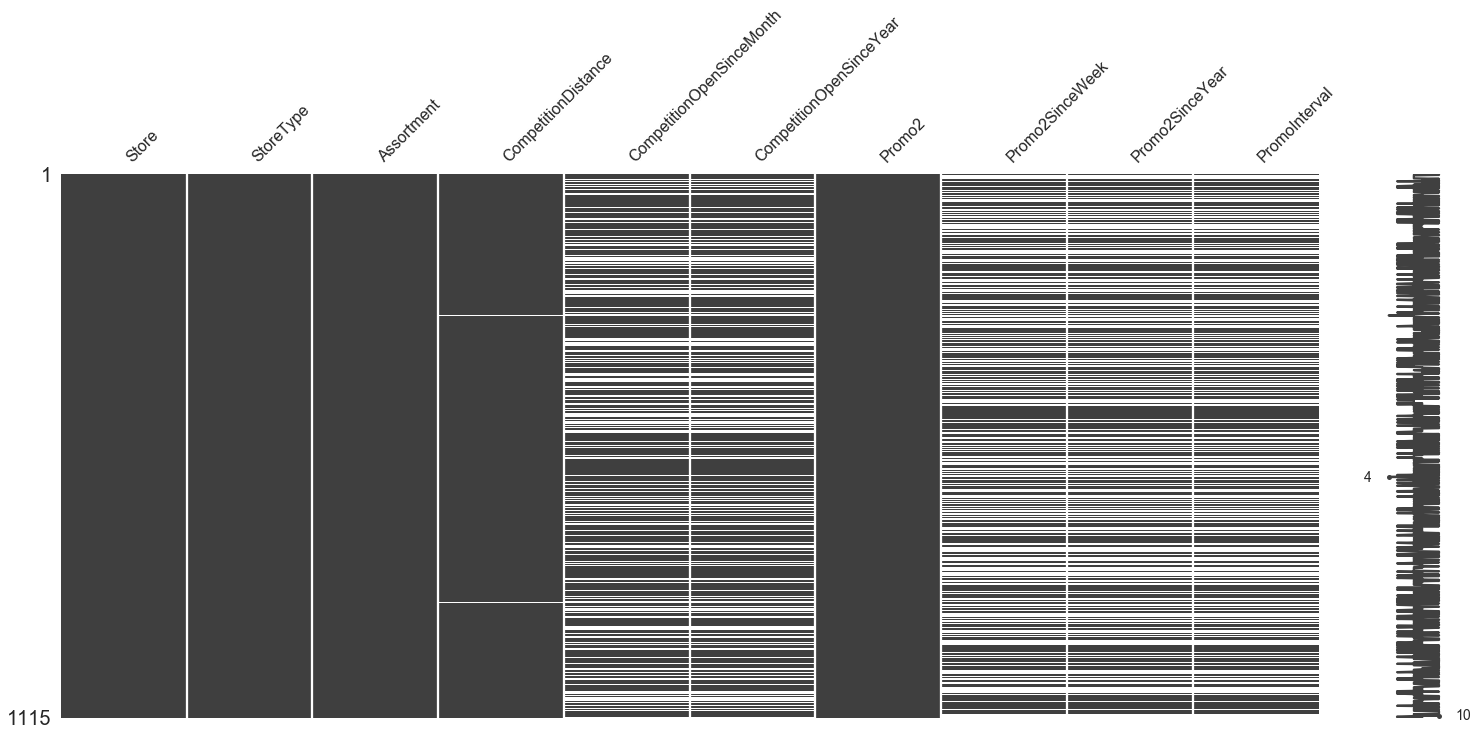

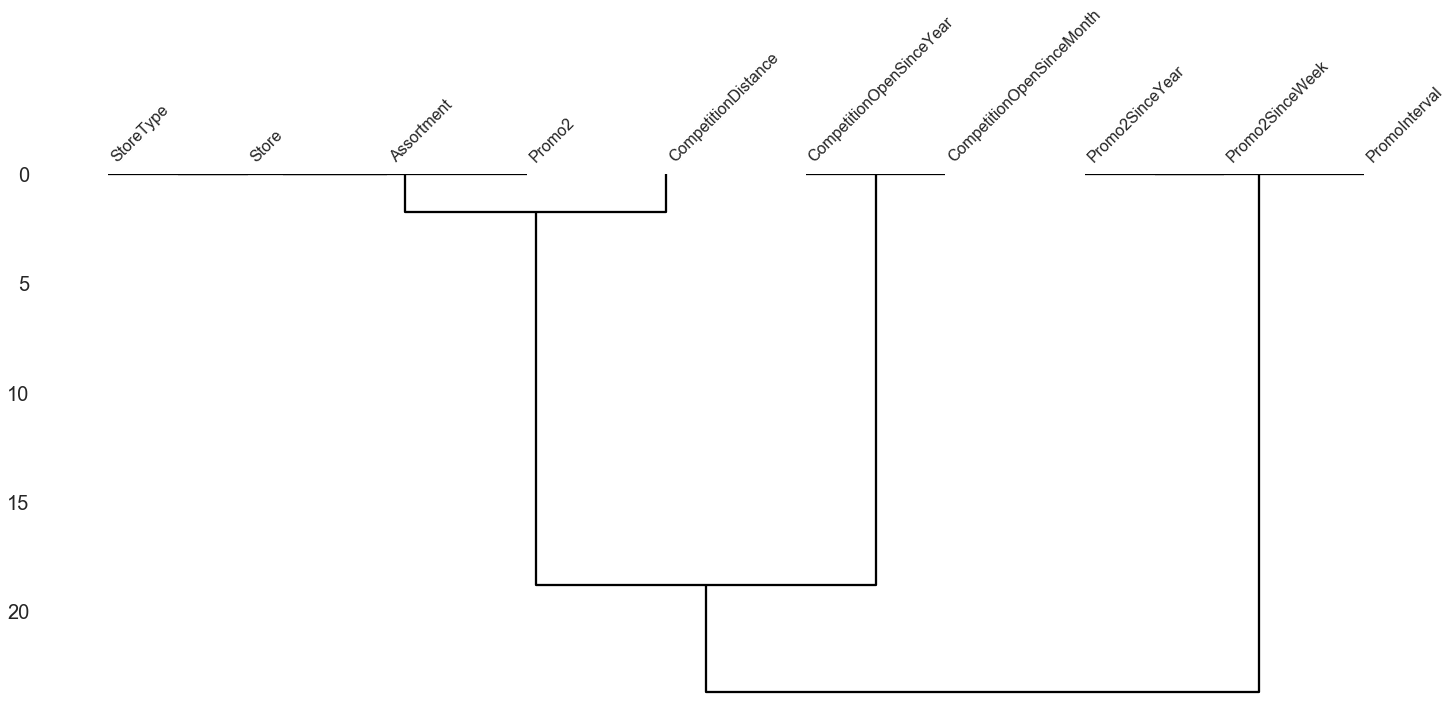

In [124]:
import missingno as msno
msno.matrix(store)
msno.dendrogram(store)

From this matrix we can confirm that the missing columns are linked together having the same number of missing values therefore removing all of them won't impact the rest of the dataframe analysis.

In [125]:
store = store.dropna(axis=0)

Now that we dropped the rows we can check again to see if there is still missing values.

In [126]:

store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**4 - Data type update**

From the data discovery subsection, we would discover the preassigned data types for each data frame columns, with the command: store.info() and train.info(). Let's now be more specific about the each column's type.

In [127]:
#creating for loops to change the data type of the columns from both dataframes.For example, columns such as 'Open' or 'Promo"
#can be indentified as booleans holding value of 0 when it's False and 1 when it's True, 
#therefore the boolean type if more appropriate.

for col in ['StoreType','Assortment','Promo2']:
    store[col]= store[col].astype('category')
    
for col in ['Promo2']:
    store[col]= store[col].astype('bool')
    
for col in ['Open', 'Promo', 'StateHoliday','SchoolHoliday']:
    train[col]= train[col].astype('bool')
    
for col in ['DayOfWeek']:
    train[col]= train[col].astype('category')
    
train['Date'] = pd.to_datetime(train['Date'])

We can now read the info for each data frame and confirm that the new data types have been implemented. 

In [128]:
train.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null category
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null bool
Promo            1017209 non-null bool
StateHoliday     1017209 non-null bool
SchoolHoliday    1017209 non-null bool
dtypes: bool(4), category(1), datetime64[ns](1), int64(3)
memory usage: 35.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 1110
Data columns (total 10 columns):
Store                        365 non-null int64
StoreType                    365 non-null category
Assortment                   365 non-null category
CompetitionDistance          365 non-null float64
CompetitionOpenSinceMonth    365 non-null float64
CompetitionOpenSinceYear     365 non-null float64
Promo2                       365 n

As you can see, the changes have been applied, taking the 'Open' column as example again, it is now marked as 'bool' for booleans. 

**5 - Expand the Dataframes**

Now that we have cleaned the data frames and updated the values' types. We can think about adding new columns that will simplify our analysis. 

In this particular case, I would like to create and day of the week column stating in letters the days of the week eg:'Tuesday', but also to extract the Month and the day of the month, from the 'Date' column of the train data frame.

In [129]:
train['Month']=train['Date'].dt.month #extract the month  (ex: 12)
train['Year']=train['Date'].dt.year #extract the year (ex: 2011)
train['Day']=train['Date'].dt.day #extract the day (ex: 1)
train['Dayoftheweek']=train['Date'].dt.weekday_name #(ex: Monday)


#using mapping and lambda expression to replace to create a month column with the month abreviations

look_up = {1: 'Jan', 2: 'Feb', 3: 'Mrch', 4: 'April', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',11:'Nov',12: 'Dec'}

train['Monthofyear']  = train['Month'].apply(lambda x: look_up[x])

Now that we have created the colums we can have another look at the 'train' data frame sample.

In [130]:
train.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear
329855,1085,2,2014-09-23,6471,694,True,False,False,False,9,2014,23,Tuesday,Sep


It worked, 6 new columns have been created! Month, Year, Day, Dayoftheweek and Monthofyear.

**6 - Create a new data frame**

I find both data frames interesting, but joining them will give us more insights.

I will then join them on their common column 'Store'. 

To start we need to work on the 'train' data frame grouping each row by store number in order to be able to merge it with the 'store' dataframe holding only unique values in this specific column.

In [131]:
#Sum the train dataframe by store number summing up the others columns 
trainsumbystore = train.groupby('Store').sum().reset_index()
 
#Merge the two datasets 

mergedtable = pd.merge(trainsumbystore, store, on='Store')

Now we have 3 main datasets, train, store and the mergedtable.

# Data Analysis

I am now going to answer few questions that I find interesting, in order to understand Rossmann's current situation.

**1 - How are the sales envolving over time? **

From the graph below we can see that we don't have any record for the end of the year 2015.
If we focus on the first 6 months for each year, a natural growth year over year is noted except for the month of March where the sales of 2013 were better than the ones from 2014 which equals to a drop of about 4%.

The biggest growth during these 6 months was in June, comparing 2014 and 2015 we note an increase of about 9%. Also, the less performing month is Feburary. I assume that the number of bank holidays and the short month could impact the sales, however, December is the best performing month.

Regarding the second half of the year, comparing 2013 and 2014, the shops were peforming much worst in 2014. For this observation, the negativae growth is about -13,22% (calculated below the graph).

The second graph shows the sales by day of the month, each daily sales have been summed then divided by the number of sales to get the average. We can actually notice a trend: 

- The first day of the month is actually the worst one in terms of sales and in average.

- There is an increase in sales at the beginning of the month, in the middle and at the end, the 3 highest points being the  2nd, the 16th and the 30th of each month.

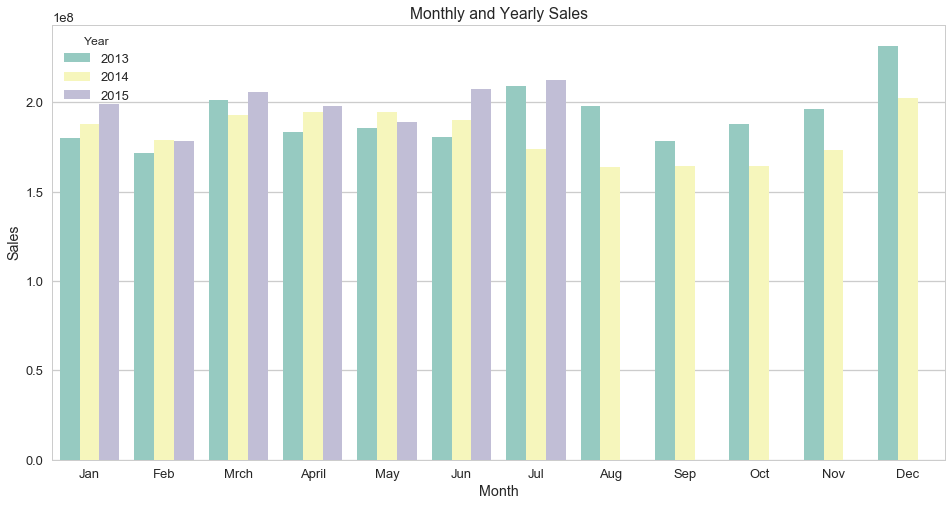

In [206]:
sns.set_style('whitegrid')
sns.set_palette('Set3')

salesintime = train[['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

sns.set_context("talk")
plt.figure(figsize = (16,8))

g=sns.barplot(x='Month', y='Sales', data = salesintime, hue='Year')
g.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels= ['Jan','Feb','Mrch','April', 'May',
             'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'])
g.set_title('Monthly and Yearly Sales')


In [207]:
#Growth calculation regarding the second half of the year 2014 vs 2013
cc = train [['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

#Create a variable filtering by month and year

cc2013 = cc[(cc['Month']>=7) & (cc['Year']==2013)]
cc2013 = cc2013['Sales'].sum()

cc2014 = cc[(cc['Month']>=7) & (cc['Year']==2014)]
cc2014 = cc2014['Sales'].sum()

#apply the formula

growth = ((cc2014-cc2013)/cc2013)*100
growth

-13.216506246823851

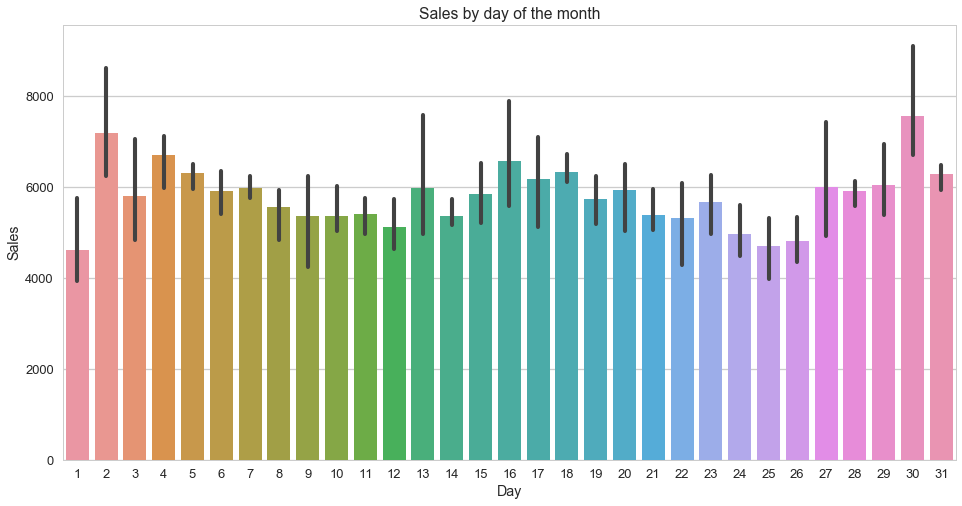

In [209]:
salesintime = train[['Year','Day','Sales']].groupby(['Year','Day']).mean().reset_index()


sns.set_context("talk")
plt.figure(figsize = (16,8))

g=sns.barplot(x='Day', y='Sales', data = salesintime).set_title('Sales by day of the month')



**2 -  What are the top 20 best selling stores? **

This is a simple barplot showing the top 20 best performing stores in terms of sales. The shop number 262 generated the highest revenue, 19.52 million.

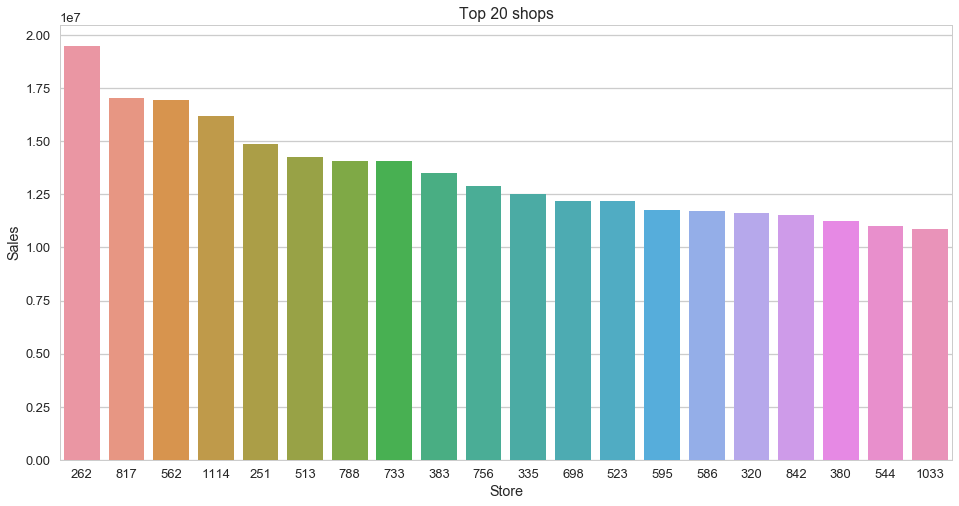

In [18]:

#Create a dataframe with the store id and the adequate sales
topshop =train [['Store','Sales']]

#Group by store
topshop = topshop.groupby('Store').sum()

#Sort the dataframe by order descending
topshop =topshop.sort_values('Sales', ascending=False)

#Grab the top 20 shops
topshop = topshop.head(20).reset_index()

#plot it
plt.figure(figsize = (16,8))

sns.barplot(x='Store', y='Sales', data=topshop, order=topshop['Store']).set_title('Top 20 shops')



**3 -  Is the revenue varying depending on the store type? **

In addition to the store listing, there is the store type to consider. Indeed, it's interesting here to see if a store type is performing better than another.

The store type 'a' is the best performing, generating 962 million which is about 2 times what's the store type  'd' is generating and about 4 times what the store type 'c' is generating.

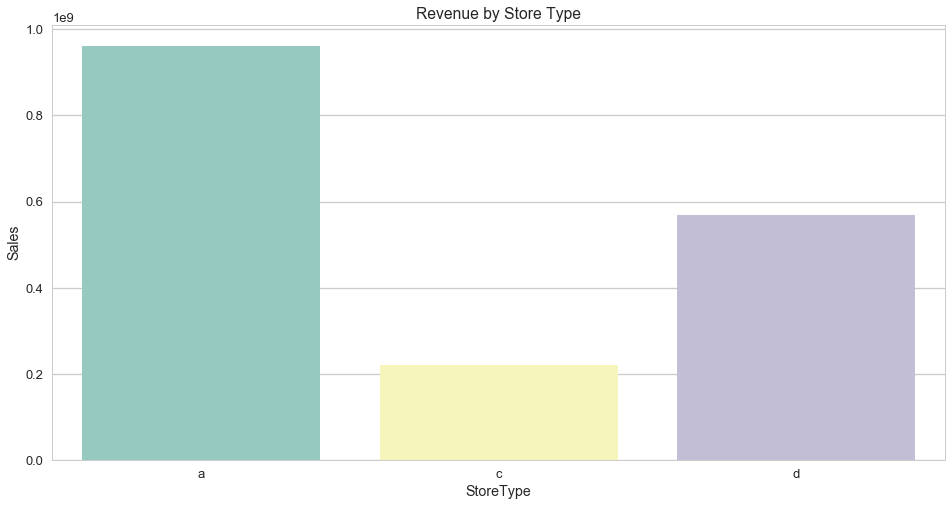

In [19]:
#create new df with needed cols
salesstoretype= mergedtable[['StoreType', 'Sales']]

#group by 'storetype' and sym the 'sales'
salesstoretype= salesstoretype.groupby('StoreType').sum().sort_values(by='Sales',ascending=False)

#reset the index to be able to plot it
salesstoretype= salesstoretype.reset_index()

#plot it
plt.figure(figsize = (16,8))
sns.barplot(x='StoreType', y='Sales', data=salesstoretype).set_title('Revenue by Store Type')
sns.set_style('whitegrid')
sns.set_palette('Set3')

**4 -  What are the total sales and ABS per day of the week and month? **

Which day of the week or month generate the highest revenue, and ABS (Average Basket Size). I created two separate graphs side by side to ease the comparison.

Regarding the sales graphs on the left, the beginning of the week is when the stores are generating more money, on Mondays and Tuesdays, the third best day is on Fridays.

Which is also applicable for the ABS, except that it's exceptionally higher on Wednesday than Friday, respectively at 9.08 and 9.04.


If we have a look at the right graph, representing the sales and ABS my month, we can note that March and July are the best performing months in terms of sales. But, the ABS is higher in December with 9.71 euros spent in average and 9.24 euros in July.

In [20]:
#Create two new dataframe

basketweek = train[['Dayoftheweek','Sales','Customers']]
basketweek = basketweek.groupby('Dayoftheweek').sum()
basketweek = basketweek.sort_values(by='Sales',ascending = False)
basketweek = basketweek.reset_index()
basketweek['Basket'] = basketweek['Sales'] / basketweek['Customers'] 

basketmonth = train[['Monthofyear','Sales','Customers']]
basketmonth = basketmonth.groupby('Monthofyear').sum()
basketmonth = basketmonth.sort_values(by='Sales',ascending = False)
basketmonth = basketmonth.reset_index()
basketmonth['Basket'] = basketmonth['Sales'] / basketmonth['Customers'] 


#Create the format of our plot grid

fig = tools.make_subplots(rows=1,
                          cols=2,
                          print_grid=True,
                          horizontal_spacing=0.18
                        
                         )

#Define the 4 traces 

trace1 = dict(type='bar',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Sales')],
              name='Sales',            
              marker=dict(color= 'rgba(220,49,72, 0.8)', 
                          line= dict(width= 1)),
              showlegend=False
             )
 

trace2 = dict(type='scatter',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Basket')], 
              marker= dict(line= dict(width= 1), 
                           size= 8), 
              line=dict(color= '#B0122C',
                        width= 1.5),
              name= 'ABS',
              showlegend=False
             )


trace3=dict(type='bar',
            x=basketmonth[('Monthofyear')],
            y=basketmonth[('Sales')],
            name='Sales',
            marker=dict(color= 'rgba(220,49,72, 0.8)', line= dict(width= 1)),
            showlegend=False 
          )
trace4=dict(type='scatter',
            x= basketmonth[('Monthofyear')],
            y=basketmonth[('Basket')],
            marker= dict(line= dict(width= 1), 
                         size= 8), 
            line=dict(color= '#B0122C', width= 1.5),
            name= 'ABS',
            showlegend=False
           )

# Append the first two traces to subplot (1,1), and the last two, to subplot (1,2):

fig.append_trace(trace1, 1, 1)# trace1 is in position 0 of the list fig['data]
fig.append_trace(trace2, 1, 1)#                       1 
fig.append_trace(trace3, 1, 2)#                       2
fig.append_trace(trace4, 1, 2)#                       3

# Now we update yaxis for both trace2 and trace4 - meaning positon 1 and 3
fig['data'][1].update(yaxis='y3')
fig['data'][3].update(yaxis='y4')

# Update layout


fig['layout'].update(autosize= False, 
              width= 800, 
              height= 500, 
              showlegend=False,
                     title='Sales and ABS by day of the week and month',hovermode='x')


fig['layout']['xaxis1'].update(tickangle= -45, #'x1'
                         autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Days of the Week', 
                         type= 'category',
                         )
fig['layout']['yaxis1'].update( #left yaxis'y1
                         showgrid=True, 
                         title= 'Sales',
                         )

#Insert a new key, yaxis3, and the associated value:
fig['layout']['yaxis3']=dict(
                          overlaying= 'y1', 
                          anchor= 'x1', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'ABS'
                         )

fig['layout']['xaxis2'].update(autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Months', 
                         type= 'Months',
                         )
fig['layout']['yaxis2'].update(
                         showgrid=True, 
                         title= 'Sales',
                         )
#Insert a new key, yaxis4, and the associated value:
fig['layout']['yaxis4']=dict(
                          overlaying= 'y2', 
                          anchor= 'x2', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'ABS'
                         )

iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**5 -  What are the best selling assortment? **

We have seen that there are different types of store, we now going to compare the assortment types.

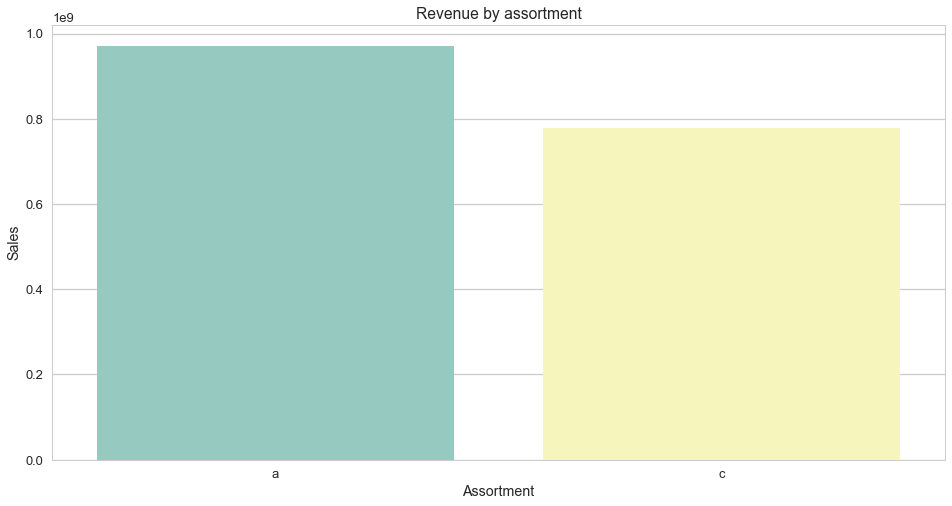

In [21]:
salesassortment= mergedtable[['Assortment', 'Sales']]
salesassortment= salesassortment.groupby('Assortment').sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()

plt.figure(figsize = (16,8))
sns.barplot(x='Assortment', y='Sales', data=salesassortment).set_title('Revenue by assortment')

**6 - What are the best assortment by shop type **

What if we cross the information, and find out how each assortment are sold in each store's type?  It's interesting to see that the assortment 'a' is better sold in the stores of type 'a', and that the assortment 'c' is better sold in the stores of type 'd'. To finish the assortments are sold equally in the stores of type 'c'.

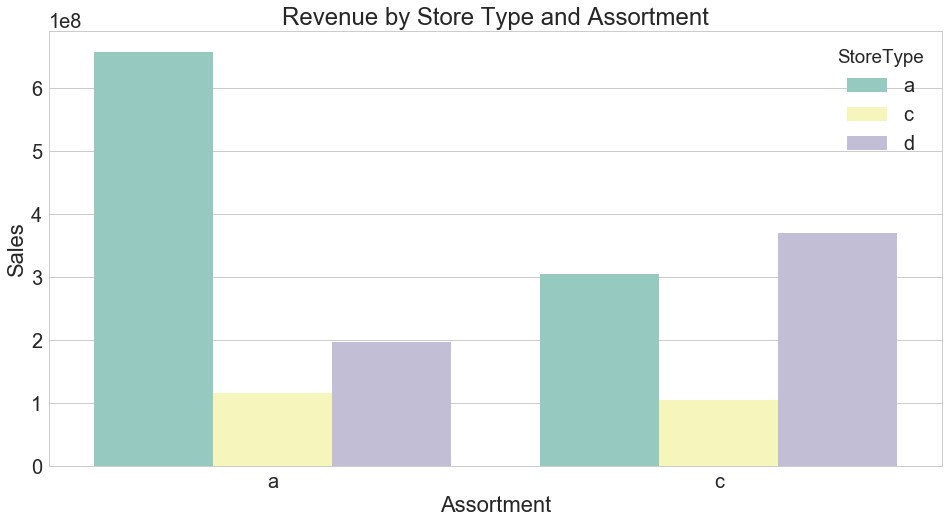

In [33]:
salesassortment= mergedtable[['StoreType','Assortment', 'Sales']]
salesassortment= salesassortment.groupby(['StoreType','Assortment']).sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()

#create filtered variables by storetype

a = salesassortment[salesassortment['StoreType']=='a']
b = salesassortment[salesassortment['StoreType']=='b']
c = salesassortment[salesassortment['StoreType']=='c']
d = salesassortment[salesassortment['StoreType']=='d']

#plot it

plt.figure(figsize = (16,8))
sns.barplot(x='Assortment', y='Sales', data=salesassortment, hue='StoreType').set_title('Revenue by Store Type and Assortment')
sns.set_style('whitegrid')
sns.set_palette('Set3')

** 7 - How are the columns correlated? **

Here, I have created this pair plot to have a quick idea or confirmation of the potential correlation between columns in the 'mergedtable' table. There is a positive correlation between the number of customers and sales which was guessable in other words when the number of customer increases the sales are increasing. Regarding the sales and the competition, we don't see a clear correlation. It would be however interesting to see if the fact the competitor is close to a Rossmann shop influences the sales or not.

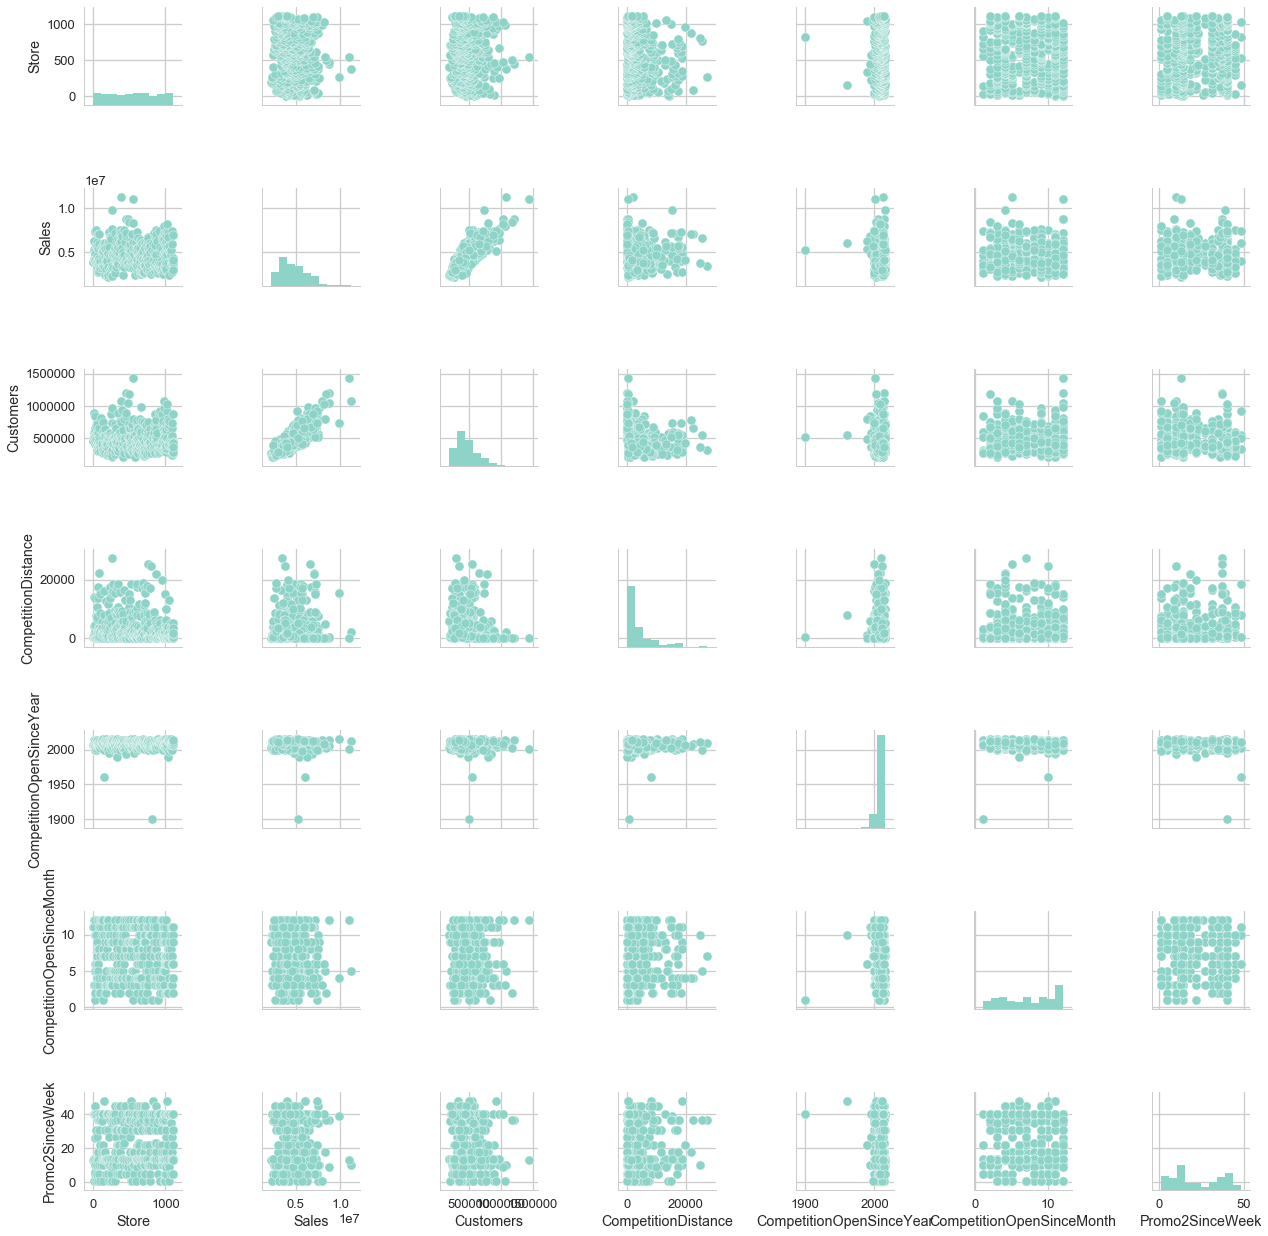

In [23]:
sns.pairplot(mergedtable[['Store','Sales','Customers','CompetitionDistance',
                          'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth',
                          'Promo2SinceWeek']])

sns.set_style('whitegrid')
sns.set_palette('Set3')

The heatmap below, also shows the correlation between columns.

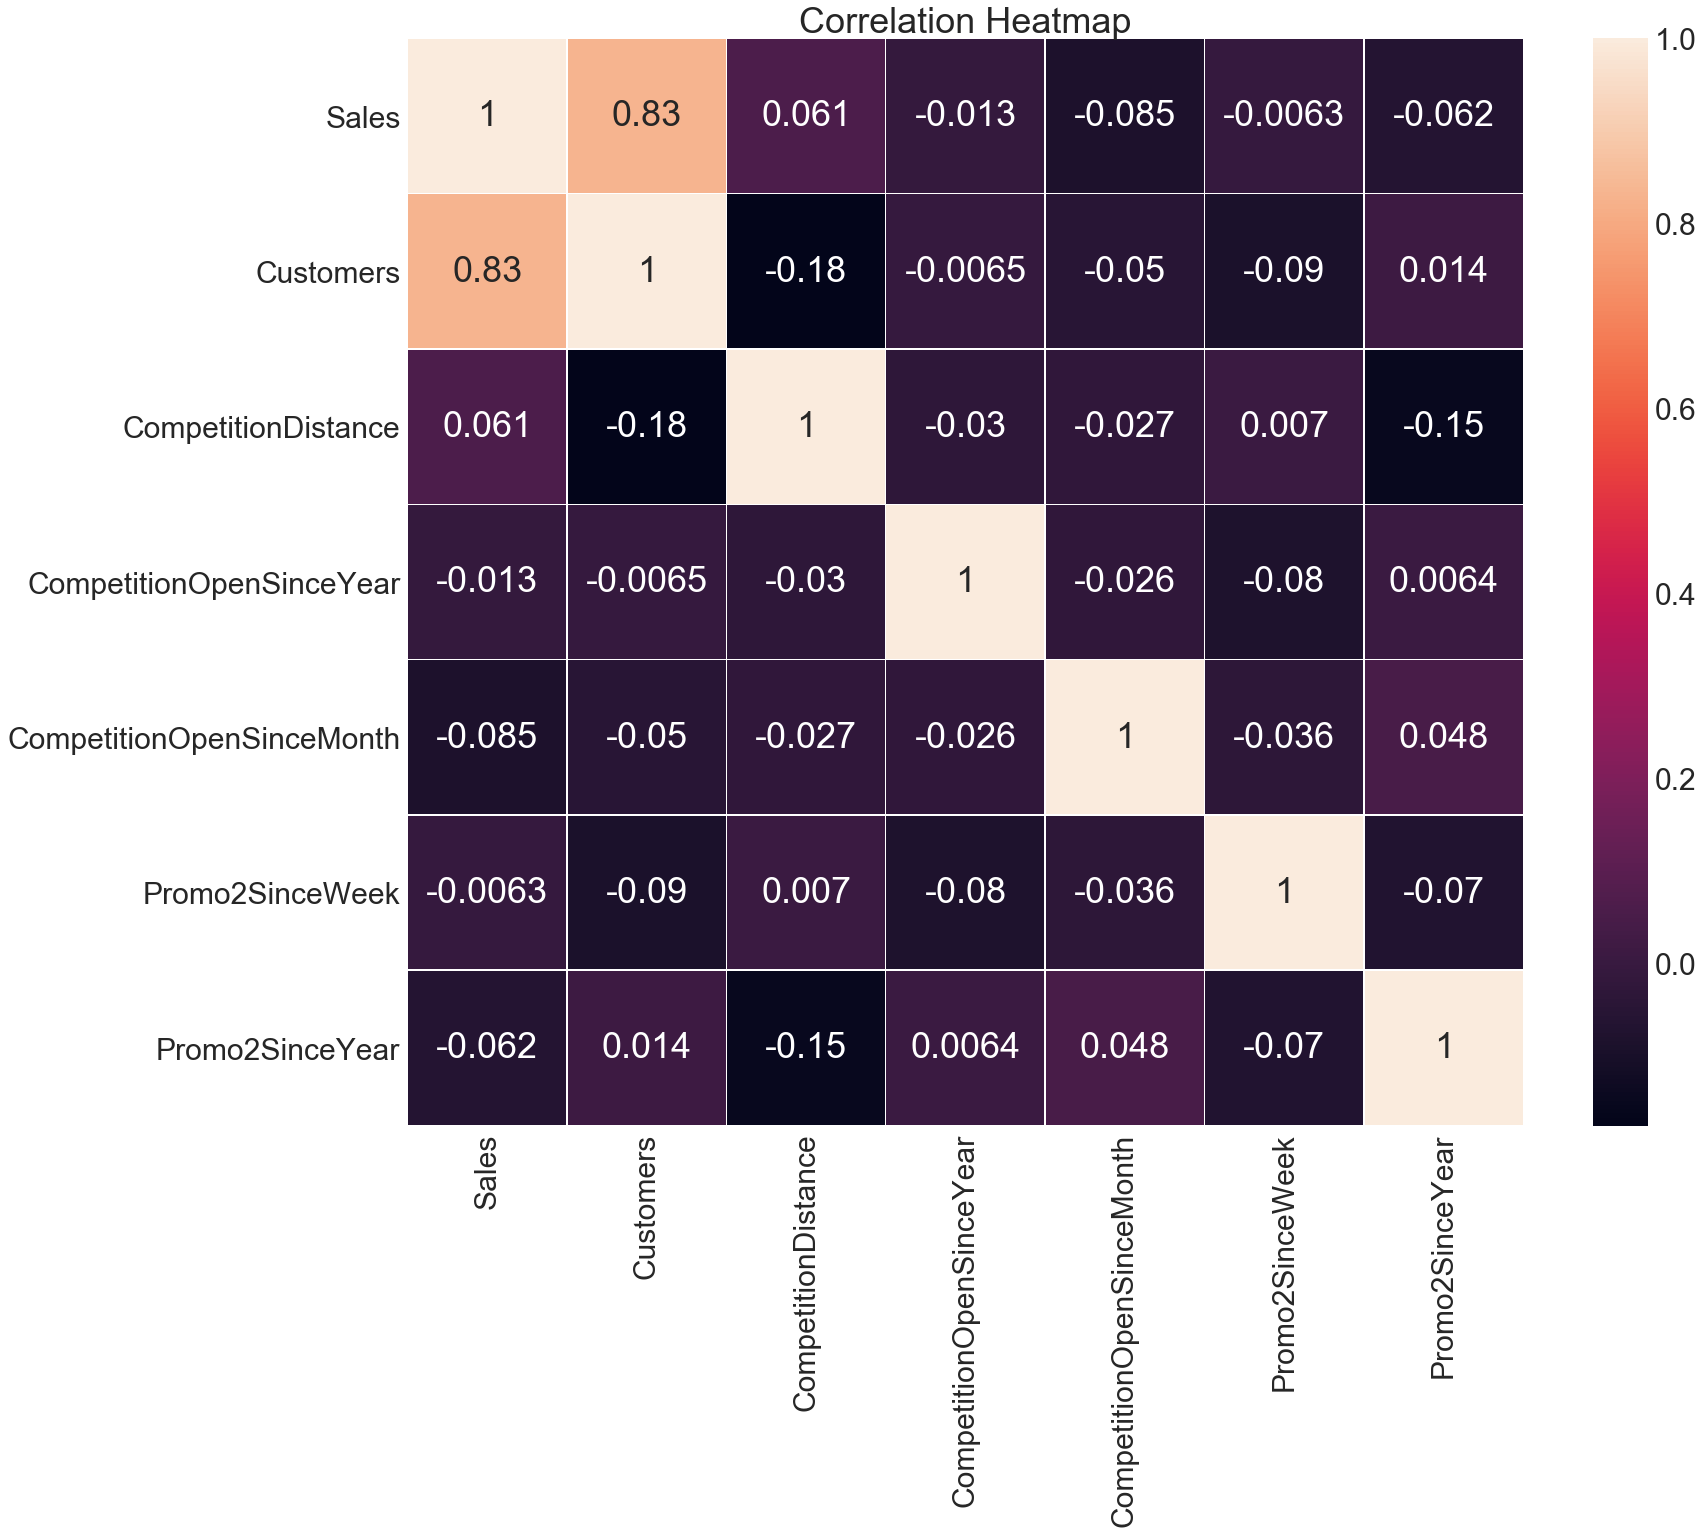

In [24]:

sns.set_style('whitegrid')
sns.set_palette('Set3')

m = mergedtable[['Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']]
m = m.corr()

plt.figure(figsize = (25,20))
sns.set(font_scale=3)

sns.heatmap(m, annot=True, linewidths=.5).set_title('Correlation Heatmap')


** 8 - How is the competition distance linked to the sales? **

From the heatmap above we can see that the positive correlations are not surprising and most of the columns a poorly correlated. 

We are now creating a plot, with axes representing different bins and their respective Sales. 

The idea is to see if the distance of the first competitor influences the sales.

We can note based on the histogram below that the highest sales are made when the first competitor is located between 0 and 250 meters but this trend is not necessarily decreasing with the distance being higher.

As you can see on this graph the closer the competitor the better it is for Rossmann, however, it starts dropping from 250 meters and increasing again from 1000 meters.

I would assume that the competition is beneficial to Rossmann because they are able to attract customers from the competition with campaigns or a better assortment when both shops are separated by a short walking distance.

From 250 to 1000 the walking distance is still acceptable but the 2 shops are more spread, people will then probably choose the one close to their current location (house, office). 

And to finish from 1000 and above the revenue is increasing with the distance, the further the competition is the better for Rossmann, probably because the distances are way bigger, and easier to reach the shop via public transportation or car, therefore people would choose the closest shop.


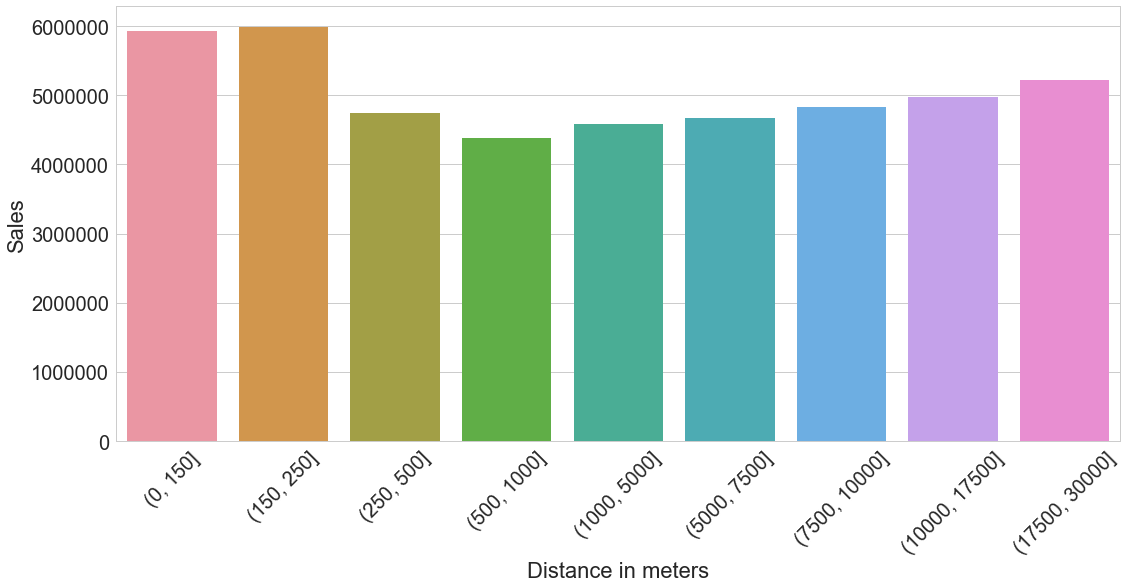

In [34]:
#merge 2 df
mm = pd.merge(trainsumbystore, store, on='Store')

#select needed cols
mm =mm[['CompetitionDistance','Sales']]

#create bins

bins = [0,150,250,500,1000, 5000, 7500,10000, 17500, 30000]

#create bins using the bins as values

mm['distanceBinned'] = pd.cut(mm['CompetitionDistance'], bins)

mmbinned = mm[['distanceBinned','Sales']]

mmbinned = mmbinned.groupby('distanceBinned').mean().reset_index()
mmbinned

#plot

plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='distanceBinned', y='Sales', data = mmbinned)
ax.set(xlabel='Distance in meters')

sns.set_style('whitegrid')
sns.set_palette('Set3')

** 9 - How are the store types performing during the different promo intervalls? **

The promo intervals are naming the months the promotion is starting. I wanted to know if the sales' performance was different by store types based on a specific promo interval. 

The idea is to come up with the best promo interval by store type!

The box plot below will help us to answer the question. 

The best period for the store type 'a' and 'c' is March, June, September and December, even if the dispersion looks higher in the last interval for the store 'a', the average is better in that period (middle one). 

Concerning the store type 'd', the first and last intervals are comparable, but looking at the data frame to have precise values, the last interval is better based on the mean.

In this graph, the mean is also represented by the grey dot.

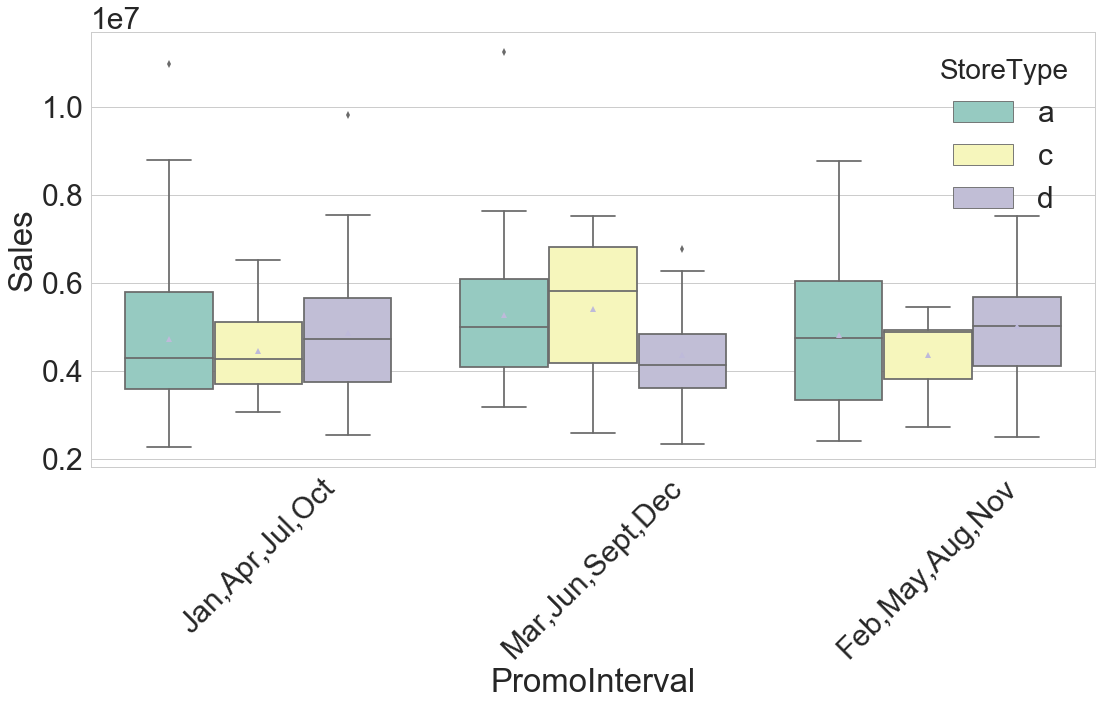

In [26]:
mergedtable.groupby(['PromoInterval','StoreType']).mean().reset_index()


plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
sns.boxplot(x='PromoInterval', y='Sales', data = mergedtable, hue= 'StoreType', showmeans=True)

sns.set_style('whitegrid')
sns.set_palette('Set3')

In [27]:
mergedtable[['PromoInterval','StoreType','Sales']].groupby(['StoreType','PromoInterval']).mean()

Sales
StoreType PromoInterval                 
a         Feb,May,Aug,Nov   4.807156e+06
          Jan,Apr,Jul,Oct   4.721948e+06
          Mar,Jun,Sept,Dec  5.275469e+06
c         Feb,May,Aug,Nov   4.364823e+06
          Jan,Apr,Jul,Oct   4.444419e+06
          Mar,Jun,Sept,Dec  5.399503e+06
d         Feb,May,Aug,Nov   5.025776e+06
          Jan,Apr,Jul,Oct   4.870871e+06
          Mar,Jun,Sept,Dec  4.372964e+06

** 10 -  How are the school holidays and/or running sales impacting the ABS and global sales? **

I decided to create 2-factor plots highlighting each 4 scenarios. 

1: School holidays and Promo are both True

2: School holidays and Promo are both False

3: School holidays is True and Promo is False

3: School holidays is False and Promo is True

We can get an idea about the situation : 

On Fridays we record the highest revenue and number of customers when there is no school holidays and no promotion. However, for the other days of the week, it's like the promotion factor is attracting more people, therefore, more revenue. 

When there is a school holiday, the fact to have promotions on allows to keep the sales at a steady level and avoids the drop at the end of the week.

What about the ABS, when do people spend more money during those scenarios? 

The second-factor plot is zooming on the ABS only, we can see that when there are no school holidays people tend to spend more money generally speaking when there is a promotion, in this scenario, Mondays is performing the best, however, when there is no promotion Fridays is the best performing day. 


Regarding the ABS the above observations is the same when there are school holidays.

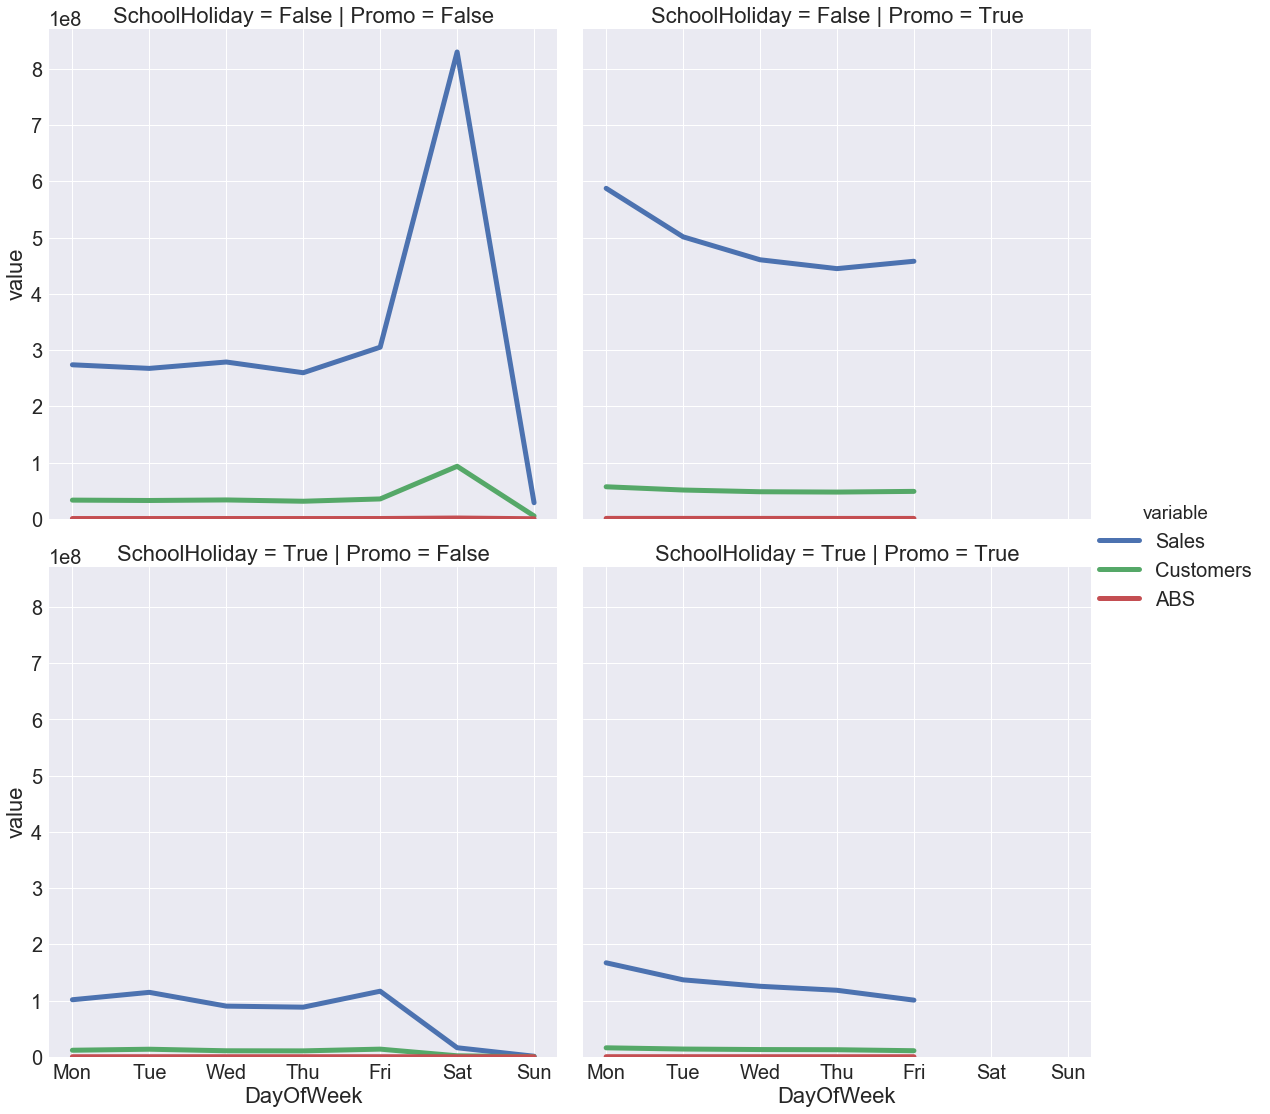

In [28]:
#create new df
cc = train[['Sales','Customers', 'Promo','SchoolHoliday','DayOfWeek']]

#create new col 'ABS'
cc['ABS'] = cc['Sales']/cc['Customers']
cc = cc.groupby(['DayOfWeek','Promo','SchoolHoliday']).sum().reset_index()
cc = pd.melt(cc, id_vars=['DayOfWeek','Promo','SchoolHoliday'], value_vars=['Sales', 'Customers','ABS'])

#map it
sns.set(font_scale=2)
g = sns.FacetGrid(cc, col='Promo', row='SchoolHoliday', hue='variable', aspect = 1, size = 8)
g.map(plt.plot, 'DayOfWeek','value', linewidth=5 ).add_legend()
g.set(ylim=(0, None))
g.set(xticks=[1, 2, 3, 4, 5,6,7], xticklabels=['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun'])
sns.set_style('whitegrid')
sns.set_palette('Set3')


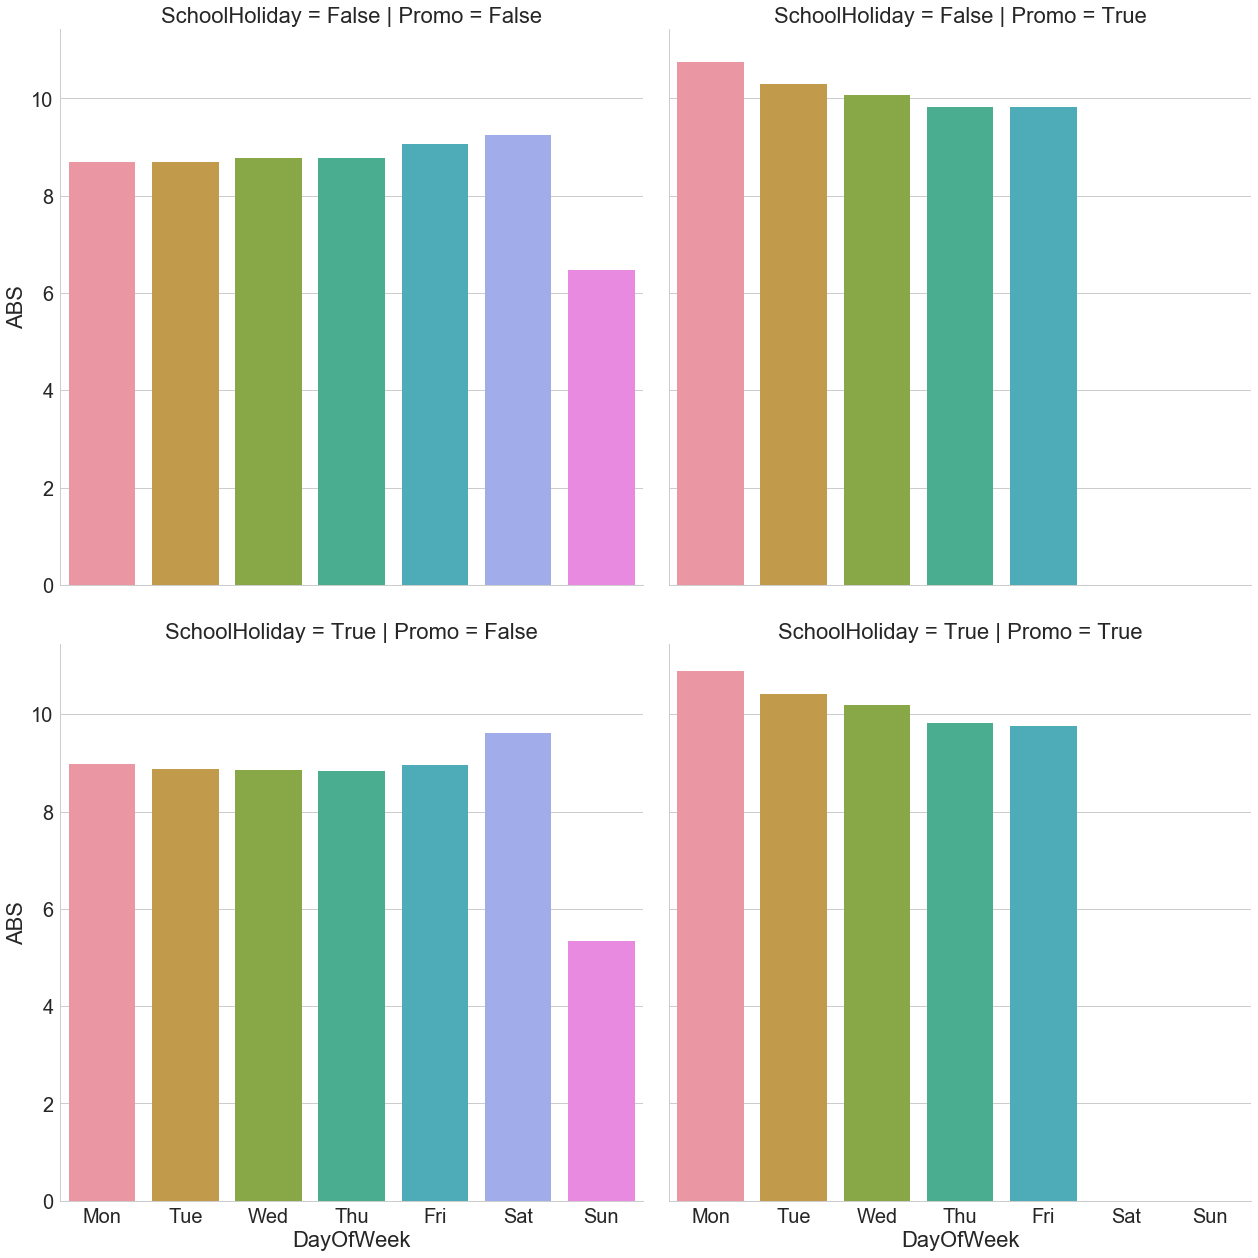

In [35]:
plt.figure(figsize = (18,8))
bb = train[['Sales','Customers', 'Promo','SchoolHoliday','DayOfWeek']]

bb['ABS'] = bb['Sales']/bb['Customers']

bb = bb.groupby(['DayOfWeek','Promo','SchoolHoliday']).mean().reset_index()

sns.set_style('whitegrid')
sns.set_palette('Set3')

g = sns.factorplot(x="DayOfWeek", y="ABS",
               col="Promo",row='SchoolHoliday', data=bb, kind="bar", size= 9)

g.set(xticks=[0,1, 2, 3, 4, 5,6], xticklabels=['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun'])



**Conclusion **


In this first part we have been discovering the datasets, updating the data fields, but also creating data frames and new columns to facilitate the analysis and the understanding using a different kind of plots.
We have learned that some characteristics can influence the sales, such as the store type, the assortments, the distance of the first competitor, the day of the week and the month.
Some insights might be useful to take into account to know how to influence the sales positively or any other metrics.
In the second part, we are going to predict Rossmann the sales using Machine Learning techniques.